In [1]:
import nltk

In [2]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [3]:
len(messages)

5574

In [4]:
messages[5000]

'ham\tHmph. Go head, big baller.'

In [5]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no,message)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

**Observation:** <br>
Clearly this is a tab seperated file

In [6]:
import pandas as pd

In [7]:
messages = pd.read_csv('SMSSpamCollection' , sep = '\t', names =['label','message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.describe(include = 'all')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

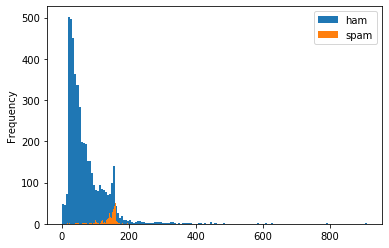

In [12]:
messages.groupby('label')['length'].plot.hist(bins = 150)
plt.legend(loc = 'best')

In [13]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [14]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

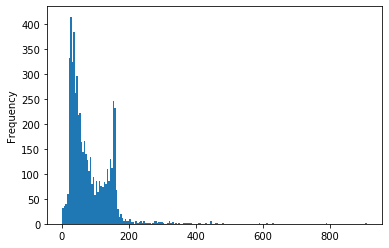

In [15]:
messages['length'].plot.hist(bins = 200)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001589D462248>,
      dtype=object)

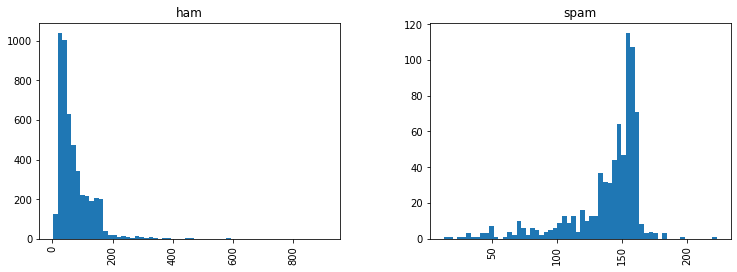

In [16]:
messages.hist(column = 'length', by = 'label' , bins = 60, figsize=(12,4))

In [17]:
import string

In [18]:
#remove punctuations
mess = 'Sample message! Notice: it has punctuation'

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
nopunc = [c for c in mess if c not in string.punctuation]
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [21]:
nopunc = ''.join(nopunc)
nopunc

'Sample message Notice it has punctuation'

In [22]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [23]:
#removing stopwords
from nltk.corpus import stopwords

In [24]:
clean_mess = [word for word in nopunc.split() if word not in stopwords.words('english')]

In [25]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [26]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

### Tokenization

In [27]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Count Vectorization

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [30]:
print(len(bow_transformer.vocabulary_))

11425


In [31]:
mess4 = messages['message'][3]
mess4

'U dun say so early hor... U c already then say...'

In [32]:
bow4 = bow_transformer.transform([mess4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [33]:
print(bow4.shape)

(1, 11425)


In [34]:
bow_transformer.get_feature_names()[4068]

'U'

In [35]:
bow_transformer.get_feature_names()[9554]

'say'

In [36]:
messages_bow = bow_transformer.transform(messages['message'])

In [37]:
print('Shape of Sparse Matrix', messages_bow.shape)

Shape of Sparse Matrix (5572, 11425)


In [38]:
#non zero occurences are: 
messages_bow.nnz

50548

In [39]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


After the count is done, the term weighing and normalization can be done using scikit leanr tdidf.

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer

In [41]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [42]:
tfidf4 = tfidf_transformer.transform(bow4)

In [43]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [44]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [45]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['U']]

3.966206571809915

In [46]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [49]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size = 0.3)

In [52]:
msg_train

3999    We tried to call you re your reply to our sms ...
110                        Dont worry. I guess he's busy.
4084    Good afternoon, my love. It was good to see yo...
2171    CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER ...
2212    Just gettin a bit arty with my collages at the...
                              ...                        
5312    Here got ur favorite oyster... N got my favori...
839     We tried to contact you re our offer of New Vi...
2153    Hi kindly give us back our documents which we ...
3304           It'll be tough, but I'll do what I have to
2900    Aight, I should be there by 8 at the latest, p...
Name: message, Length: 3900, dtype: object

In [53]:
from sklearn.pipeline import Pipeline

In [54]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [55]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001589D655CA8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [56]:
predictions = pipeline.predict(msg_test)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1438
        spam       1.00      0.71      0.83       234

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [59]:
type(msg_test)

pandas.core.series.Series

In [60]:
msg_test

3932    Nooooooo I'm gonna be bored to death all day. ...
3823                             Just normal only here :)
2156                       What year. And how many miles.
3822    You are right though. I can't give you the spa...
1512    Oops sorry. Just to check that you don't mind ...
                              ...                        
4329    Congrats! 2 mobile 3G Videophones R yours. cal...
277                Tell rob to mack his gf in the theater
4401                      Juz go google n search 4 qet...
719     You have WON a guaranteed £1000 cash or a £200...
4168                          Are you at work right now ?
Name: message, Length: 1672, dtype: object

In [62]:
pd.Series("hello how are you?")

0    hello how are you?
dtype: object

In [63]:
pipeline.predict(pd.Series("Congratulations you have won a jackpot. call 5555 to claim."))

array(['spam'], dtype='<U4')

In [64]:
import pickle

In [65]:
pickle.dump(pipeline,open('model.pkl','wb'))

In [69]:
((-1*2)-3)/(-1)

5.0

In [70]:
b = pipeline.predict(pd.Series("Congratulations you have won a jackpot. call 5555 to claim."))
b

array(['spam'], dtype='<U4')

In [71]:
b[0]

'spam'

In [74]:
print("your message is: {}".format(b[0]))

your message is: spam
